# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df= pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [10]:
df = df.dropna(subset=["CustomerID"])

In [11]:
# removing duplicates
df = df.drop_duplicates()

In [12]:
# removing negative quantities
df = df[df["Quantity"] > 0]

In [13]:
# removing zero or negative pricing
df = df[df["UnitPrice"] > 0]

In [14]:
df.shape

(392692, 8)

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


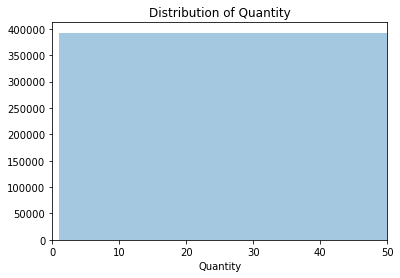

In [22]:
# Distribution of Quantity
plt.figure(figsize=(6,4))
sns.distplot(df["Quantity"], bins=50, kde=False)
plt.title("Distribution of Quantity")
plt.xlim(0,50) # zoom in
plt.show()

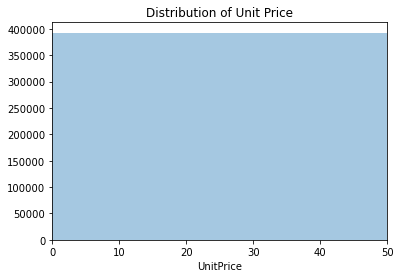

In [23]:
# Distribution of Unit Price
plt.figure(figsize=(6,4))
sns.distplot(df["UnitPrice"], bins=50, kde=False)
plt.title("Distribution of Unit Price")
plt.xlim(0,50)
plt.show()

In [24]:
# Add TotalSales column
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract Year-Month
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

# Monthly sales
monthly_sales = df.groupby("YearMonth")["TotalSales"].sum()

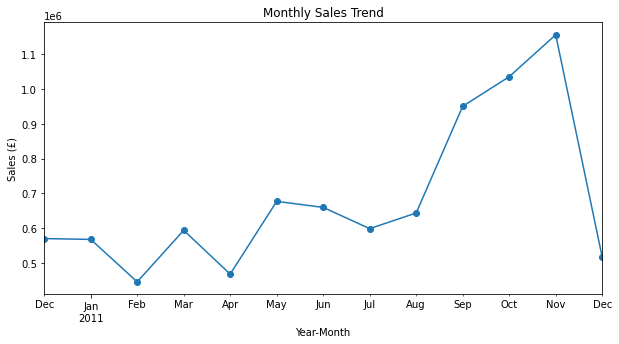

In [25]:
plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales (£)")
plt.xlabel("Year-Month")
plt.show()

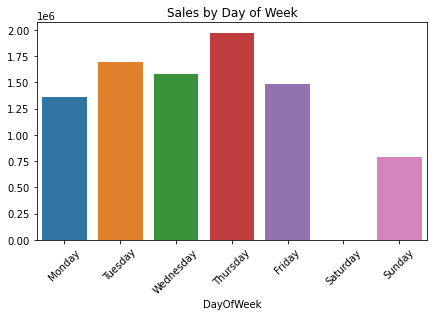

In [26]:
# Day of Week sales
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
weekday_sales = df.groupby("DayOfWeek")["TotalSales"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(7,4))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title("Sales by Day of Week")
plt.xticks(rotation=45)
plt.show()

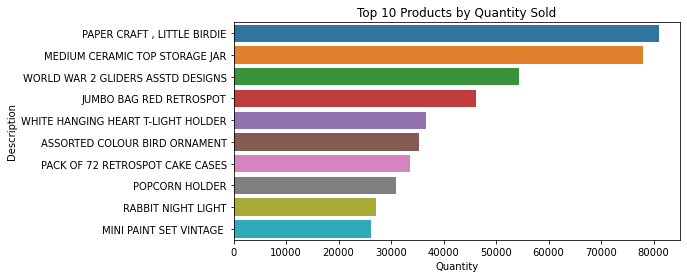

In [27]:
# Top 10 products by quantity
top_products = df.groupby("Description")["Quantity"].sum().nlargest(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity")
plt.show()

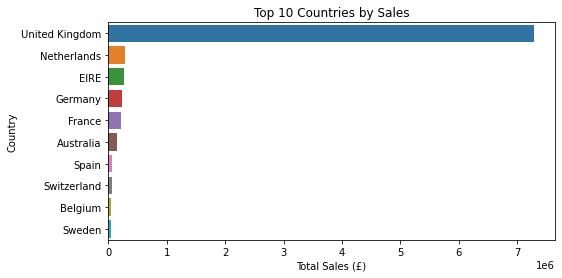

In [28]:
# Top 10 countries by sales
top_countries = df.groupby("Country")["TotalSales"].sum().nlargest(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales (£)")
plt.show()

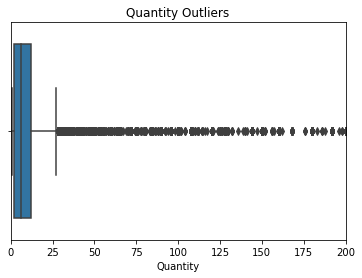

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Quantity"])
plt.xlim(0,200)
plt.title("Quantity Outliers")
plt.show()

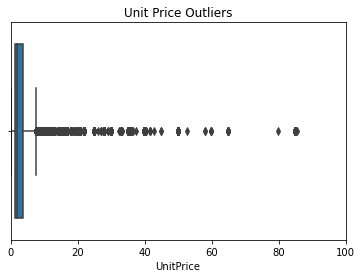

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["UnitPrice"])
plt.xlim(0,100)
plt.title("Unit Price Outliers")
plt.show()

In [31]:
print("📊 Summary of Findings:")
print("""
1. Data cleaning removed missing IDs, duplicates, negative values.
2. Most products have small quantities (1-10 items).
3. Unit prices are mostly under £20, but some extreme outliers exist.
4. Sales trend shows peaks around Nov-Dec (Christmas season).
5. Weekdays (especially Thursday & Friday) have higher sales.
6. Top-selling product: 'WHITE HANGING HEART T-LIGHT HOLDER'.
7. Most sales come from the UK, followed by Netherlands, EIRE, Germany.
8. Outliers exist in Quantity (huge orders) and UnitPrice (high-priced items).
""")


📊 Summary of Findings:

1. Data cleaning removed missing IDs, duplicates, negative values.
2. Most products have small quantities (1-10 items).
3. Unit prices are mostly under £20, but some extreme outliers exist.
4. Sales trend shows peaks around Nov-Dec (Christmas season).
5. Weekdays (especially Thursday & Friday) have higher sales.
6. Top-selling product: 'WHITE HANGING HEART T-LIGHT HOLDER'.
7. Most sales come from the UK, followed by Netherlands, EIRE, Germany.
8. Outliers exist in Quantity (huge orders) and UnitPrice (high-priced items).

